In [59]:
library(tidyverse)

Q0. Write a function that takes a vector and replaced it with the mean of the that vector
  * Let's call that function `replace_na_mean`

  * Try your function using the following snippet:

```
replace_na_mean(c(1, NA, 2, 3, 2, 2, NA))
```

In [154]:
### Write your code here
x <- (c(1, NA, 2, 3, 2, 2, NA))

replace_na_mean <- function(x){
    na_index <- which(is.na(x))
    mean_x <- mean(x,na.rm=TRUE)
    x[na_index]<-mean_x
    return(x)
}

replace_na_mean(x)


[1] 1 2 2 3 2 2 2

Q1. Write a function that returns the sample space for the experiment consisting of samplign a 4 digit PIN
  * Call your function get_all_perms

  * Essentially, your function does not take any arguments but returns the sample space consisting of all the four digit numbers
   
  * The function `expand.grid` expand.grid creates a data frame from all combinations of the supplied vectors or factors. For example:
 
  ```expand.grid(0:1, 0:1, 0:1)```

* generates  

![](https://www.dropbox.com/s/cnlt4fg8rxd01d6/expand.grid.png?dl=1)
 

* Strategy, use `expand.grid` to generate the permutation for four verctation in the range 0:9
  * Return the number of rows in that `data.frame`

  

In [113]:
### Write your code here

#generates data frame 


# crate function for calculate number of row
get_all_perms<-function(){
        sample = expand.grid (0:9,0:9,0:9,0:9)
        df = data.frame(sample)
        return(nrow(df))
        }
        
get_all_perms()

[1] 10000

In [114]:
# Running this should return 10,000
get_all_perms()

[1] 10000

Q2. The function above is not very useful since it always computes the same thing, namely the number of possible permutation of digits. One way to make it more useful is by passing as an argument the number of digits to consider, i.e., the number of columns in `expand.grid`. Let;s call that param `size`, which by default should be `4`. For exmaple:

*  `get_all_perms(size = 1 )` will return all the number of size 1 (0-9)
*  `get_all_perms(size = 3 )` will return all the permutations of size 3 (000 - to 999)


* Hint: `expand.grid` requires the number of input parameters to match the permutation length. We need to automate that so that the number of vectors passed as input matches the `size` values passed into `get_all_perms`
  * We can do that using `replicate`
  * `replicate(2, c(1,2,3), simplify=FALSE)` will repeat the vector `c(1,2,3)` twice
    * We need to pass `replicate` the value `simplify=FALSE` so that it does not convert the output for us into a matrix
  * Use pipe (`%>%`) pass the output of `replicate` into expand.grid
  * Make sure replicated generate the correct input for exand.grid
  

In [118]:
replicate(size, c(0:9), simplify=FALSE)%>%expand.grid

ERROR: Error in integer(n): object 'size' not found


In [124]:
### Write your code here


#generates data frame 


# crate function for calculate number of row
get_all_perms<-function(size=4){
        replicate(size, c(0:9), simplify=FALSE)%>% expand.grid%>%data.frame%>%nrow%>%return
        }
        
get_all_perms(3)


[1] 1000

Q3.

* Given a fish disease that occurs with a probability of p= 0.43
* You sampled 340 animals
* How many of these animals should you expect to see the disease in?
* Hint: you will need to compute the probability of each element of the sample space and find the value that has the highest probability

In [151]:
### Write your code here
p=0.43
number_fish_disease = sample(c(0, 1), size=340, replace=TRUE, prob=c(1-p, p))%>%sum
number_fish_disease

[1] 129

Q4. Plot the two following distributions:

$$
x \sim \mathcal{N}(10, 0.5) \\
y \sim \mathcal{N}(10.2, 0.5) \\
$$

* Your plot should look like the following
![](https://www.dropbox.com/s/psrjtl6abjla7z5/sample_gaussian_plot.png?dl=1)


* Draw 40 values from the first distribution and store them in a variable called `x_sample`
* Draw 40 values from the second distribution and store them in a variable called `y_sample`
  * make sure you run the following line before you sample data
  ```set.seed(42)```
 
* Do a `t-`test to compute the `x_sample` and `y_sample`
  * A `t-`test compares two vectors of values and predicts if the two vectors are from the same distribution
  * The format for the t-test in R is
 
 `t.test(x,y)` where `x` an `y` are the vectors of values we would like to compare.
  * Look at the `p-value`, if it's smaller than say 0.05, then there is a statistically significant difference between the two datasets.

* Do you agree with the conclusion of the `t-test`. In other words, would you be comfortable reporting in a publication that the data in `x_sample` and `y_sample` are statistically different?

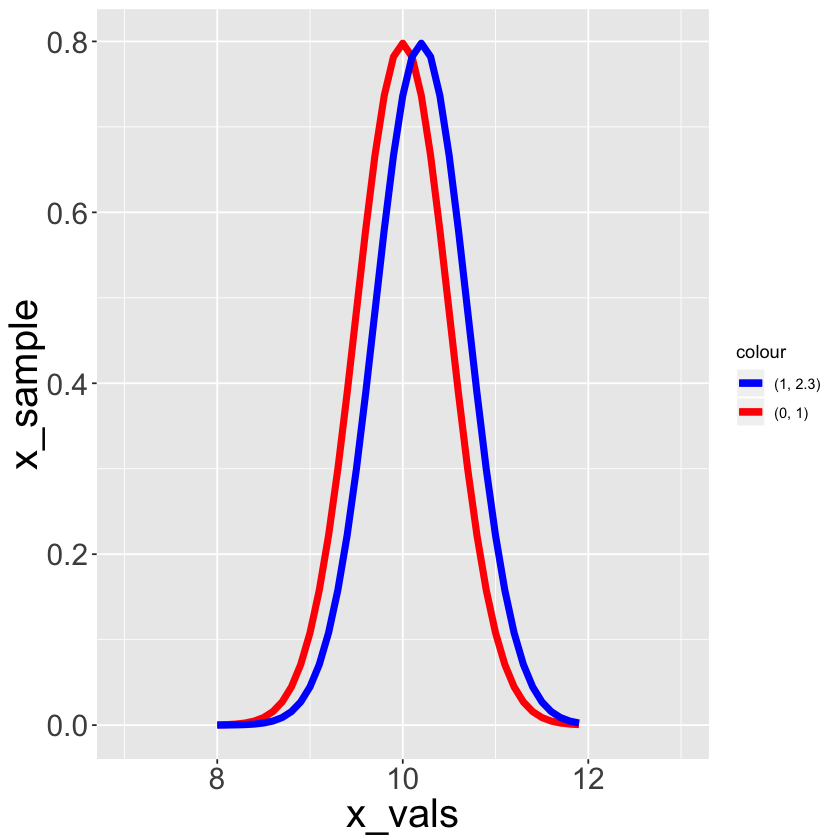

In [147]:
# Write the code to draw the plot here

set.seed(42)

x_vals = seq(8, 11.9, .1)
x_sample = mapply(dnorm, x_vals, mean = 10, sd = 0.5)
y_sample = mapply(dnorm, x_vals, mean = 10.2, sd = 0.5)


ggplot() + 
  geom_line(aes(x=x_vals, y=x_sample, color = "red"), size=2) +
  geom_line(aes(x=x_vals, y=y_sample, color = "blue"), size=2) +
  xlim(7,13)+
  theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) + 
  theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) + 
  scale_color_manual(labels = c("(1, 2.3)", "(0, 1)"), values = c("blue", "red"))

In [148]:
t.test(x_sample,y_sample)


	Welch Two Sample t-test

data:  x_sample and y_sample
t = 0.0006459, df = 78, p-value = 0.9995
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1263272  0.1264092
sample estimates:
mean of x mean of y 
0.2499833 0.2499423 


In [132]:
linspace(0,1,3)

ERROR: Error in linspace(0, 1, 3): could not find function "linspace"


In [8]:
# Write the code to run your t-test here


Q5. Challenge

* We have used the function `dnorm` to plot the bell-shaped curve for a distribution $ x \sim \mathcal{N}(10, 0.5)$
  * Use seq(8, 12, 0.1) to generate the x-axis values
  * The pdf should look like the following

![](https://www.dropbox.com/s/jl2c2atpkxze7ev/sample_pdf_sum_question.png?dl=1)

* Use `dnorm` to compute the probability density for each point along the $x-$axis generated using `seq()` above
  * What do you notice?
  * How do you fix that?
  


[1] 3.167124e-05 7.234804e-05 1.591086e-04 3.369293e-04 6.871379e-04
 [6] 1.349898e-03 2.555130e-03 4.661188e-03 8.197536e-03 1.390345e-02
[11] 2.275013e-02 3.593032e-02 5.479929e-02 8.075666e-02 1.150697e-01
[16] 1.586553e-01 2.118554e-01 2.742531e-01 3.445783e-01 4.207403e-01
[21] 5.000000e-01 5.792597e-01 6.554217e-01 7.257469e-01 7.881446e-01
[26] 8.413447e-01 8.849303e-01 9.192433e-01 9.452007e-01 9.640697e-01
[31] 9.772499e-01 9.860966e-01 9.918025e-01 9.953388e-01 9.974449e-01
[36] 9.986501e-01 9.993129e-01 9.996631e-01 9.998409e-01 9.999277e-01
[41] 9.999683e-01

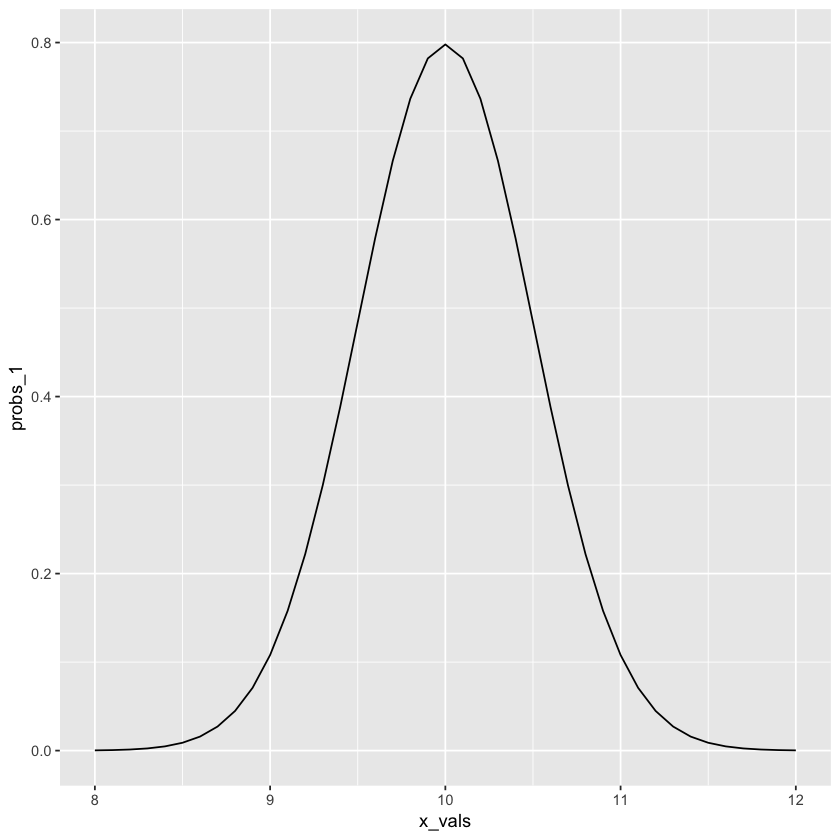

In [103]:
# Write the code to run your t-test here

x_vals = seq (8,12,0.1)
probs_1 = mapply(dnorm ,x_vals, mean=10, sd=0.5)

ggplot() + geom_line(aes(x=x_vals, y=probs_1), )


# probability_density for each point along the  𝑥− axis 

pnorm(x_vals,mean=10,sd=0.5)